## Final Project Submission

**Please fill out:
* Student name:  Victor Kabui Karanja
* Student pace: part time
* Scheduled project review date/time: 10/11/2022
* Instructor name: Rose, Noah
* Blog post URL:**


# Microsoft Movie Analysis

**# Overview**

The project analyses the performance of various types movies from various datasets and takes into the consideration the rate of return on investment for Microsoft. Exploratory data Analysis is performed to identify the most appropriate type of movie for starters. The analysis can be used by 'Microsoft' to identify which types of movie to invest in.

**# Business Problem**

Microsoft wills to venture into the movie creation sector to increase the scope of their services to the public, this would bring in more revenue by creating traffic on their movie studio. Below I use the data from imdb and other sources to analyse the best type of films for them by checking on ratings, reviews and the budgets for each film.

**# Data Understanding**

In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Assigning the csv files of the files to use in the analysis
title_basic = pd.read_csv('./zippedData/imdb.title.akas.csv.gz')
title_ratings = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
moviegros = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
moviebudget = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

*IMDB TITLE BASICS FILE*

In [3]:
title_basic.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [4]:
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [5]:
#finding the missing values in the dataset
title_basic.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [6]:
percent_missing = (title_basic.isna().sum())/3317.03
percent_missing

title_id              0.000000
ordering              0.000000
title                 0.000000
region               16.066481
language             87.423991
types                49.217523
attributes           95.500493
is_original_title     0.007537
dtype: float64

In [7]:
title_basic['language'].value_counts().head(7)

en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
Name: language, dtype: int64

With the high percentage of attributes missing from the dataset (almost all movies in the dataset don't have the attribute filed in) It would be advisable to drop it.

In [8]:
title_basic.describe()

,ordering,is_original_title
count,331703.000000,331678.000000
mean,5.125872,0.134769
std,6.706664,0.341477
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


*IMDB TITLE RATINGS FILE*

In [9]:
#previewing the dataset
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
#replace the tconst with title_id in title_ratings
title_ratings.rename(columns = {'tconst':'title_id'}, inplace=True)
title_ratings.head()

,title_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [12]:
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The title ratings had no null values, all the information was filled in and in the required format
There was a maximum average rating of 10 given in the dataset and a minimum rating of 1
From the mean and the percentile distribution, the majority of the rating was above 5

*BOM MOVIE GROSS FILE*

In [13]:
moviegros.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
moviegros.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
#Determine the percentage (%)of missing values
percent_missing = (moviegros.isna().sum())/33.87
percent_missing

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

*MOVIE BUDGETS*

In [17]:
#preview the content
moviebudget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [19]:
moviebudget.rename(columns={'movie':'title'}, inplace=True)
moviebudget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Preparation

**Data Cleaning**

*IMDB TITLE BASICS*

In [20]:
title_basic.drop(columns=['attributes', 'language'], inplace=True)

In [21]:
title_basic.duplicated(subset=None, keep= 'first').sum()

0

In [22]:
title_basic['types'] = title_basic['types'].fillna(title_basic['types'].mode()[0], axis=0)

In [23]:
title_basic['region'] = title_basic.region.fillna(title_basic.region.mode()[0], axis=0)
title_basic.head()

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,imdbDisplay,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,imdbDisplay,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


In [24]:
title_basic['is_original_title'] = title_basic['is_original_title'].fillna(title_basic['is_original_title'].mode()[0])

In [25]:
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             331703 non-null  object 
 4   types              331703 non-null  object 
 5   is_original_title  331703 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [26]:
title_basic.describe()

,ordering,is_original_title
count,331703.000000,331703.000000
mean,5.125872,0.134759
std,6.706664,0.341467
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,6.000000,0.000000
max,61.000000,1.000000


on comparing the describe before and after the data has not drifted by an alarming margin

Text(0, 0.5, 'Ordering')

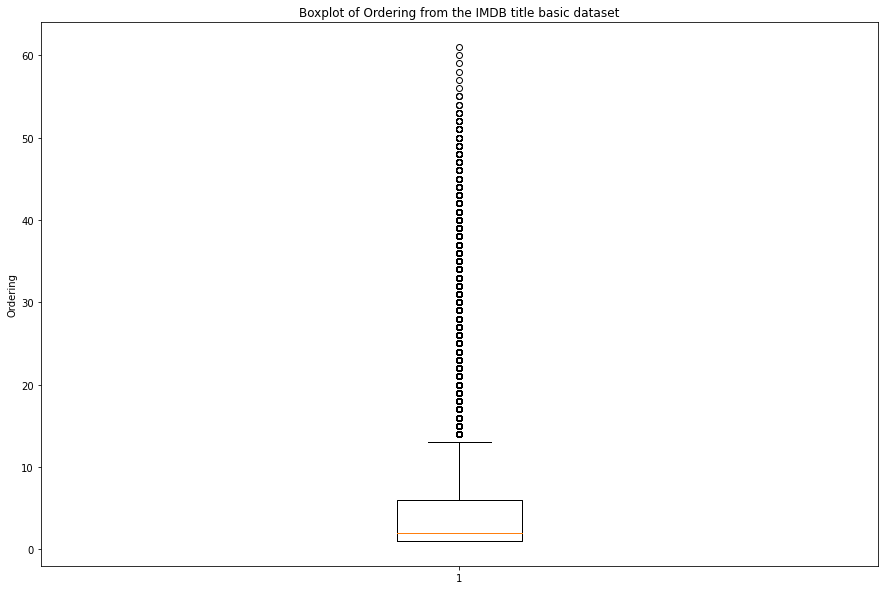

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
ax.boxplot(title_basic['ordering'])
plt.title('Boxplot of Ordering from the IMDB title basic dataset')
plt.ylabel('Ordering')

*Title Ratings*

In [28]:
title_ratings.duplicated(subset='title_id', keep='first').sum()

0

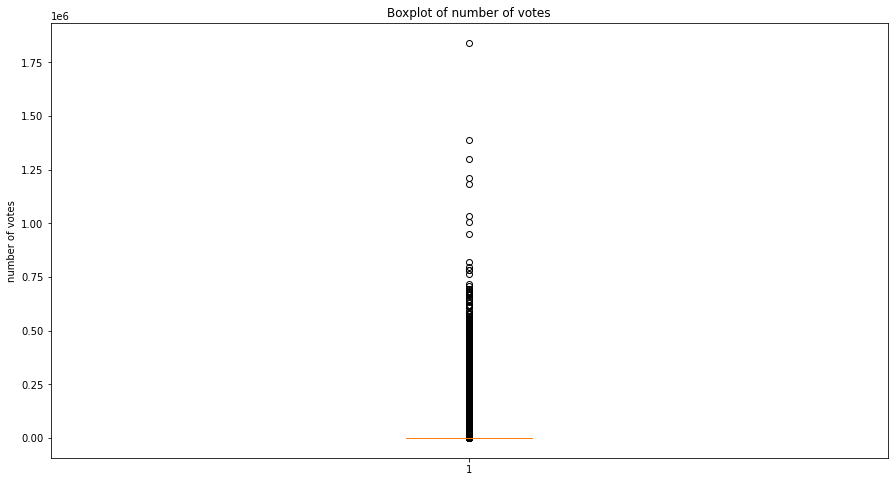

In [29]:
#identify outliers using a boxplot
fig, ax=plt.subplots(figsize=(15,8))
data = title_ratings['numvotes']
ax.boxplot(data)
plt.title('Boxplot of number of votes')
plt.ylabel('number of votes')
plt.show()

In [30]:
#removing outermost outliers from numvotes
q_low = title_ratings["numvotes"].quantile(0.01)
q_hi  = title_ratings["numvotes"].quantile(0.99)
title_ratings = title_ratings[(title_ratings["numvotes"] < q_hi) & (title_ratings["numvotes"] > q_low)]

removing the outliers for the dataset leads to distortion of the data; as a result it is better to maintain it

In [31]:
title_ratings.describe()

,averagerating,numvotes
count,70418.000000,70418.000000
mean,6.305976,1238.577665
std,1.472381,5924.823849
min,1.000000,6.000000
25%,5.400000,16.000000
50%,6.500000,53.000000
75%,7.300000,286.000000
max,10.000000,83507.000000


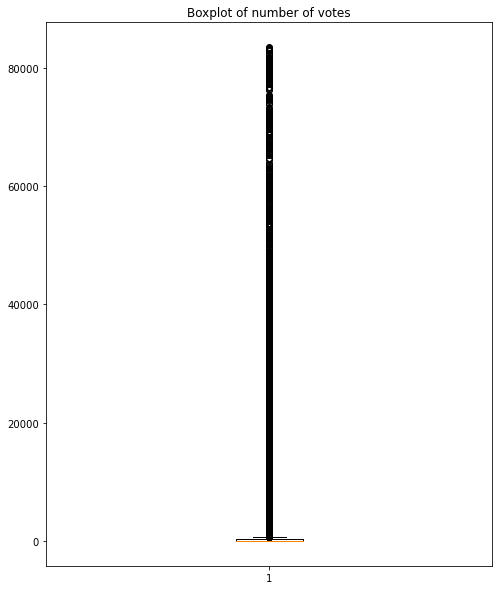

In [32]:
#identify outliers using a boxplot
fig, ax=plt.subplots(figsize=(8,10))
data = title_ratings['numvotes']
ax.boxplot(data)
plt.title('Boxplot of number of votes')
plt.show()

*bom movie gross*

In [33]:
duplicates = moviegros.duplicated(subset='title', keep='first').sum()
print(f'There is {duplicates} duplicated values')

There is 1 duplicated values


In [34]:
#dropping the duplicated values
moviegros.drop_duplicates(subset='title', keep='first', inplace=True)

In [35]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3386 non-null   object 
 1   studio          3381 non-null   object 
 2   domestic_gross  3358 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3386 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.7+ KB


In [36]:
#since the studio data is categorical the best way to fill the missing values is mode

moviegros['studio'].fillna(moviegros['studio'].mode()[0],inplace=True)
moviegros.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [37]:
# domestic_gross is a numerical column thus the best way to fill the missing values was mean of the data

moviegros['domestic_gross'].fillna(moviegros['domestic_gross'].mean(), inplace=True)

In [38]:
# removing the whitespaces in the column names

moviegros.columns = moviegros.columns.str.replace(' ', '')

In [39]:
#removing the comma separator in the values

moviegros.foreign_gross = moviegros.foreign_gross.str.replace(',', '')

In [40]:
#changing the data type of the column foreign gross to a float

moviegros['foreign_gross'] = moviegros['foreign_gross'].astype(float)

In [41]:
# filling the missing values with the mean as its a numerical column

moviegros['foreign_gross'].fillna(moviegros['foreign_gross'].mean(), inplace=True)

In [42]:
#changing the data type of the column foreign gross to a int

moviegros['foreign_gross'] = moviegros['foreign_gross'].astype(int)

In [43]:
# Previewing the first 20 entries

moviegros.head(20)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [44]:
moviegros.drop('domestic_gross',axis=1,inplace=True)
moviegros.head()

,title,studio,foreign_gross,year
0,Toy Story 3,BV,652000000,2010
1,Alice in Wonderland (2010),BV,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,664300000,2010
3,Inception,WB,535700000,2010
4,Shrek Forever After,P/DW,513900000,2010


In [45]:
moviegros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3386 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          3386 non-null   object
 1   studio         3386 non-null   object
 2   foreign_gross  3386 non-null   int32 
 3   year           3386 non-null   int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 119.0+ KB


**MOVIE BUDGETS**

Since the data movie budgets has no missig values, We proceed to change the structure of the columns and types in this section

In [46]:
moviebudget.head(2)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [47]:
moviebudget['release_date'] = pd.to_datetime(moviebudget['release_date'])

In [48]:
moviebudget['production_budget'] = moviebudget['production_budget'].str.replace('$', '')
moviebudget['worldwide_gross'] = moviebudget['worldwide_gross'].str.replace('$', '')
moviebudget['domestic_gross'] = moviebudget['domestic_gross'].str.replace('$','')

In [49]:
moviebudget['production_budget'] = moviebudget['production_budget'].str.replace(',', '')
moviebudget['domestic_gross'] = moviebudget['domestic_gross'].str.replace(',','')
moviebudget['worldwide_gross'] = moviebudget['worldwide_gross'].str.replace(',', '')

In [50]:
moviebudget.head(2)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [51]:
moviebudget['domestic_gross'] = moviebudget['domestic_gross'].astype('int64')
moviebudget['worldwide_gross'] = moviebudget['worldwide_gross'].astype('int64')
moviebudget['production_budget'] = moviebudget['production_budget'].astype('int64')

In [52]:
moviebudget.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [53]:
moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [54]:
moviebudget.drop(['worldwide_gross','id','release_date'],axis=1, inplace=True)
moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              5782 non-null   object
 1   production_budget  5782 non-null   int64 
 2   domestic_gross     5782 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 135.6+ KB


**Merging Datasets**

In [55]:
# Merging title_basic and title_ratings datasets
df1 = pd.merge(title_basic, title_ratings)
df1.head()

,title_id,ordering,title,region,types,is_original_title,averagerating,numvotes
0,tt0381957,1,Cloud Cuckoo Land,GB,imdbDisplay,0.0,7.6,23
1,tt10084780,1,Vinara sodara veera kumara,IN,imdbDisplay,0.0,8.3,30
2,tt1182315,1,Negro Buenos Aires,US,original,1.0,3.4,123
3,tt1182315,2,Black Buenos Aires,XWW,imdbDisplay,0.0,3.4,123
4,tt1182315,3,Negro Buenos Aires,ES,imdbDisplay,0.0,3.4,123


In [56]:
#joining the dataset df1 above with moviegros
df2 = pd.merge(df1,moviegros)
df2.tail()

,title_id,ordering,title,region,types,is_original_title,averagerating,numvotes,studio,foreign_gross,year
7145,tt6352548,2,Poster Boys,US,original,1.0,5.6,1234,Sony,2400000,2017
7146,tt6370266,1,Bending the Arc,US,imdbDisplay,0.0,8.1,93,Abr.,74872810,2017
7147,tt7027278,1,Kedarnath,US,original,1.0,6.0,4189,PackYourBag,74872810,2018
7148,tt7027278,2,Kedarnath,IN,imdbDisplay,0.0,6.0,4189,PackYourBag,74872810,2018
7149,tt7342204,5,I Can Speak,XWW,imdbDisplay,0.0,7.4,1105,CJ,74872810,2017


In [57]:
df=pd.merge(df2,moviebudget)
df.head(20)

,title_id,ordering,title,region,types,is_original_title,averagerating,numvotes,studio,foreign_gross,year,production_budget,domestic_gross
0,tt1235522,11,Broken City,US,imdbDisplay,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164
1,tt1235522,17,Broken City,AR,imdbDisplay,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164
2,tt1235522,26,Broken City,GR,imdbDisplay,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164
3,tt1235522,29,Broken City,PT,alternative,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164
4,tt1235522,7,Broken City,US,original,1.0,6.2,71704,Fox,74872810,2013,35000000,19701164
5,tt1294226,10,The Last Song,US,original,1.0,6.0,74914,BV,26100000,2010,20000000,62950384
6,tt1294226,27,The Last Song,US,imdbDisplay,0.0,6.0,74914,BV,26100000,2010,20000000,62950384
7,tt1294226,4,The Last Song,FI,imdbDisplay,0.0,6.0,74914,BV,26100000,2010,20000000,62950384
8,tt1294226,7,The Last Song,DK,imdbDisplay,0.0,6.0,74914,BV,26100000,2010,20000000,62950384
9,tt1308729,16,Bullet to the Head,NL,dvd,0.0,5.7,44816,WB,74872810,2013,55000000,9489829


In [58]:
#checking for missing values in the final dataset
df.isna().sum()

title_id             0
ordering             0
title                0
region               0
types                0
is_original_title    0
averagerating        0
numvotes             0
studio               0
foreign_gross        0
year                 0
production_budget    0
domestic_gross       0
dtype: int64

In [59]:
#Total gross is the sum of money collected before deductions
df['Total_gross'] = df['domestic_gross'] + df['foreign_gross']

In [60]:
df.describe()

,ordering,is_original_title,averagerating,numvotes,foreign_gross,year,production_budget,domestic_gross,Total_gross
count,2762.000000,2762.000000,2762.000000,2762.000000,2.762000e+03,2762.000000,2.762000e+03,2.762000e+03,2.762000e+03
mean,10.312093,0.242578,6.168139,34233.040912,5.857319e+07,2014.016655,2.994116e+07,3.064637e+07,8.921956e+07
std,7.868232,0.428719,1.013651,25887.748723,9.137367e+07,2.620043,3.613318e+07,4.928913e+07,1.332393e+08
min,1.000000,0.000000,1.600000,6.000000,6.000000e+02,2010.000000,5.000000e+04,0.000000e+00,1.176700e+05
25%,4.000000,0.000000,5.600000,9836.000000,7.925000e+06,2011.000000,7.000000e+06,2.705505e+06,2.307766e+07
50%,9.000000,0.000000,6.300000,33062.000000,3.140000e+07,2014.000000,1.800000e+07,1.588625e+07,7.200824e+07
75%,16.000000,0.000000,6.800000,55981.000000,7.487281e+07,2016.000000,3.575000e+07,3.853194e+07,8.669978e+07
max,41.000000,1.000000,9.200000,83507.000000,8.757000e+08,2018.000000,2.750000e+08,7.000596e+08,1.346960e+09


From the output above, most of the videos do not have original titles since the minimum all the way to the 75th percentile gives a 0.

# Analysis

Taking the production cost as the Total expenditures to get the movie to the audience, I went ahead and calculated the profit from each title as follows:

In [61]:
df['profit']=df['Total_gross']-df['production_budget']

In [62]:
df.head()

,title_id,ordering,title,region,types,is_original_title,averagerating,numvotes,studio,foreign_gross,year,production_budget,domestic_gross,Total_gross,profit
0,tt1235522,11,Broken City,US,imdbDisplay,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164,94573974,59573974
1,tt1235522,17,Broken City,AR,imdbDisplay,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164,94573974,59573974
2,tt1235522,26,Broken City,GR,imdbDisplay,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164,94573974,59573974
3,tt1235522,29,Broken City,PT,alternative,0.0,6.2,71704,Fox,74872810,2013,35000000,19701164,94573974,59573974
4,tt1235522,7,Broken City,US,original,1.0,6.2,71704,Fox,74872810,2013,35000000,19701164,94573974,59573974


In [63]:
df.describe()

,ordering,is_original_title,averagerating,numvotes,foreign_gross,year,production_budget,domestic_gross,Total_gross,profit
count,2762.000000,2762.000000,2762.000000,2762.000000,2.762000e+03,2762.000000,2.762000e+03,2.762000e+03,2.762000e+03,2.762000e+03
mean,10.312093,0.242578,6.168139,34233.040912,5.857319e+07,2014.016655,2.994116e+07,3.064637e+07,8.921956e+07,5.927840e+07
std,7.868232,0.428719,1.013651,25887.748723,9.137367e+07,2.620043,3.613318e+07,4.928913e+07,1.332393e+08,1.122426e+08
min,1.000000,0.000000,1.600000,6.000000,6.000000e+02,2010.000000,5.000000e+04,0.000000e+00,1.176700e+05,-1.110072e+08
25%,4.000000,0.000000,5.600000,9836.000000,7.925000e+06,2011.000000,7.000000e+06,2.705505e+06,2.307766e+07,3.910234e+06
50%,9.000000,0.000000,6.300000,33062.000000,3.140000e+07,2014.000000,1.800000e+07,1.588625e+07,7.200824e+07,4.176482e+07
75%,16.000000,0.000000,6.800000,55981.000000,7.487281e+07,2016.000000,3.575000e+07,3.853194e+07,8.669978e+07,7.385058e+07
max,41.000000,1.000000,9.200000,83507.000000,8.757000e+08,2018.000000,2.750000e+08,7.000596e+08,1.346960e+09,1.146960e+09


In [64]:
import seaborn as sns

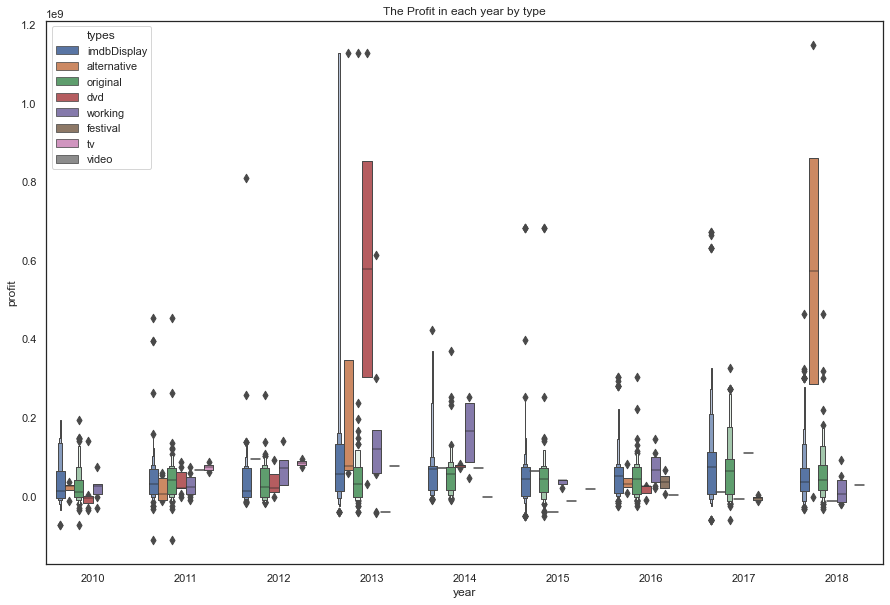

In [65]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('white')
sns.boxenplot(x= 'year', y='profit',hue='types', data=df).set_title('The Profit in each year by type');

From the Box plot above it is evident that imdbDisplay has had the highest profits for the last 7 years, this is excuding the year 2018, where the alternative types took the lead in profit

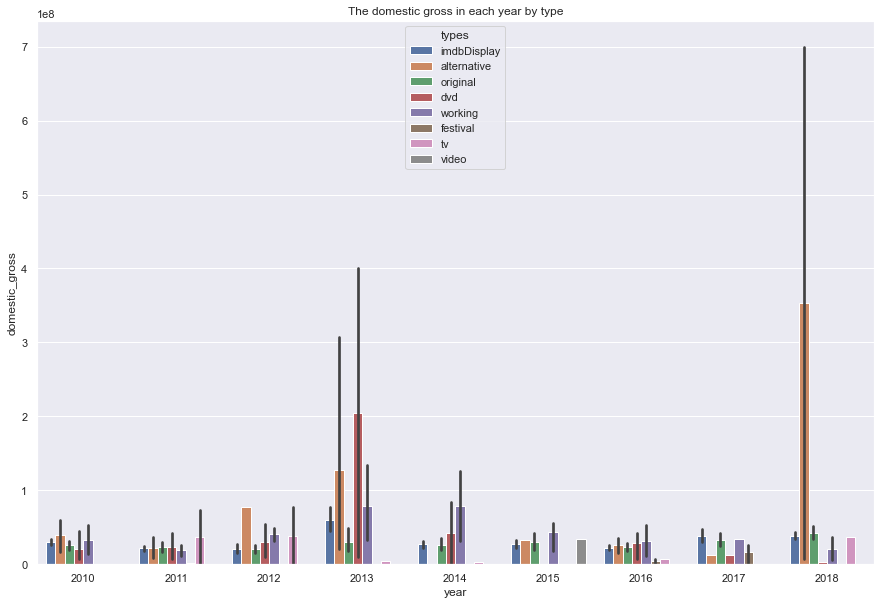

In [66]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x= 'year', y='domestic_gross',hue='types', data=df).set_title('The domestic gross in each year by type');

In 2013, DVD had the highest gross income but later dropped as we approached 2018, the reason as to why the domestic gross 
income from the movies shifted can not be clearly verified with the data available, however it could be due to the emergence of better technologies that led to them becoming obsolete as time went by. The alternative type had recorded the highest domestic_gross in the year 2018, this entry could be bayased by including several types.

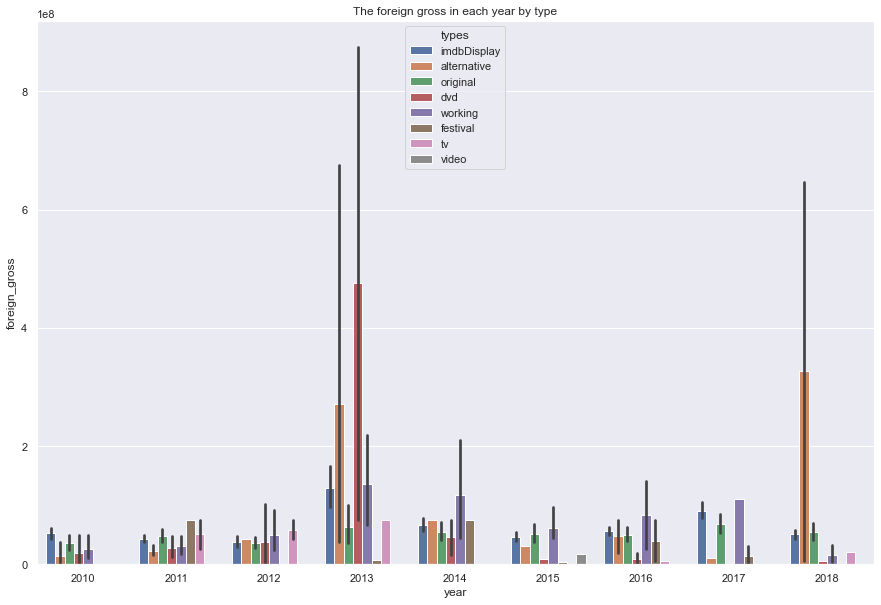

In [67]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x= 'year', y='foreign_gross',hue='types', data=df).set_title('The foreign gross in each year by type');

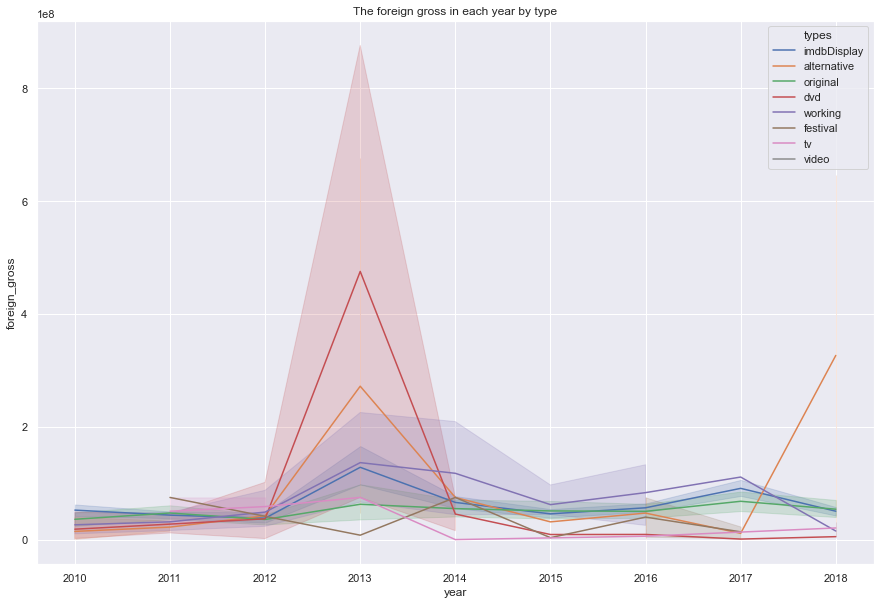

In [68]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x= 'year', y='foreign_gross',hue='types', data=df).set_title('The foreign gross in each year by type');

Once again 2013 had the highest foreign gross income generated from DVD which later reduced in the coming years
The alternative types had the highest in 2018.

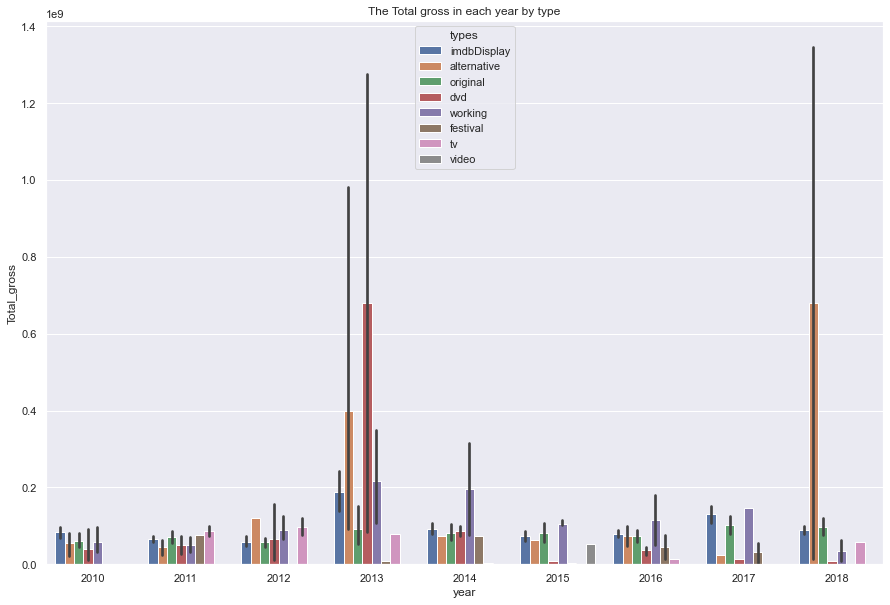

In [69]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x= 'year', y='Total_gross',hue='types', data=df).set_title('The Total gross in each year by type');

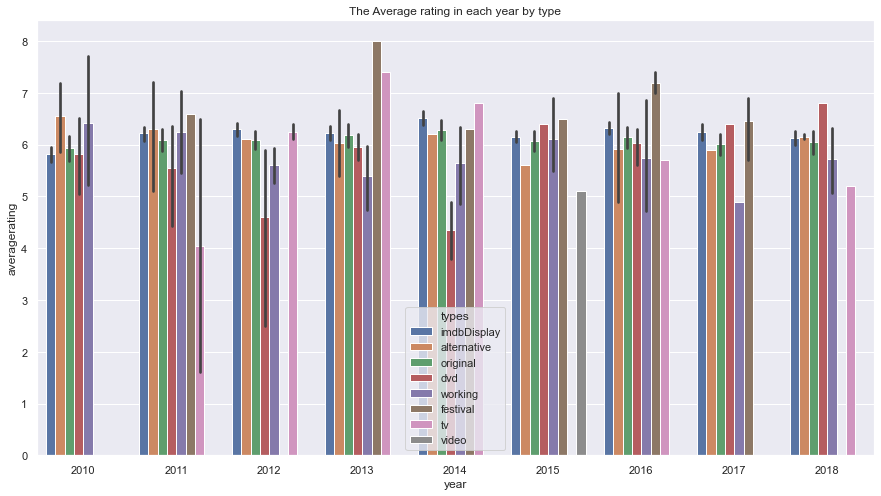

In [70]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x= 'year', y='averagerating',hue='types', data=df).set_title('The Average rating in each year by type');

Generally in all the 8 years the average rating for all types of movies was above 5

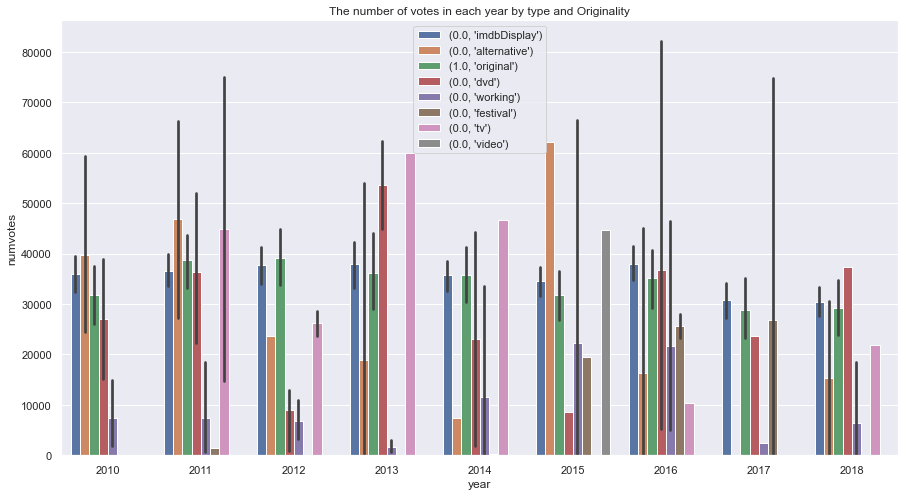

In [71]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x= 'year', y='numvotes',
            hue=df[['is_original_title','types']].apply(tuple,axis=1), 
            data=df).set_title('The number of votes in each year by type and Originality');

In [72]:
# investigating correlation for the data above
df.corr(method= 'pearson')

,ordering,is_original_title,averagerating,numvotes,foreign_gross,year,production_budget,domestic_gross,Total_gross,profit
ordering,1.000000,0.008042,-0.017140,0.414925,0.039666,-0.005927,0.157529,0.056423,0.048075,0.006356
is_original_title,0.008042,1.000000,-0.041549,-0.004772,-0.049965,-0.007790,-0.036210,-0.029368,-0.045129,-0.041915
averagerating,-0.017140,-0.041549,1.000000,0.129672,-0.019325,0.049200,-0.127544,-0.123430,-0.058913,-0.028875
numvotes,0.414925,-0.004772,0.129672,1.000000,0.082935,-0.062950,0.150431,0.066928,0.081634,0.048479
foreign_gross,0.039666,-0.049965,-0.019325,0.082935,1.000000,0.052763,0.627376,0.774264,0.972209,0.952110
year,-0.005927,-0.007790,0.049200,-0.062950,0.052763,1.000000,0.000359,0.062105,0.059158,0.070109
production_budget,0.157529,-0.036210,-0.127544,0.150431,0.627376,0.000359,1.000000,0.650543,0.670900,0.474482
domestic_gross,0.056423,-0.029368,-0.123430,0.066928,0.774264,0.062105,0.650543,1.000000,0.900909,0.860014
Total_gross,0.048075,-0.045129,-0.058913,0.081634,0.972209,0.059158,0.670900,0.900909,1.000000,0.971089
profit,0.006356,-0.041915,-0.028875,0.048479,0.952110,0.070109,0.474482,0.860014,0.971089,1.000000


From  the correlation analysis above, it is noted the foreign gross income had a greater impact on the total gross income compared to the domestic gross income

A change in average rating had no direct effect on the income from the foreign gross income.

The foreign gross income and domestic gross income are appear to be moderately correlated thus further analysis should be conducted

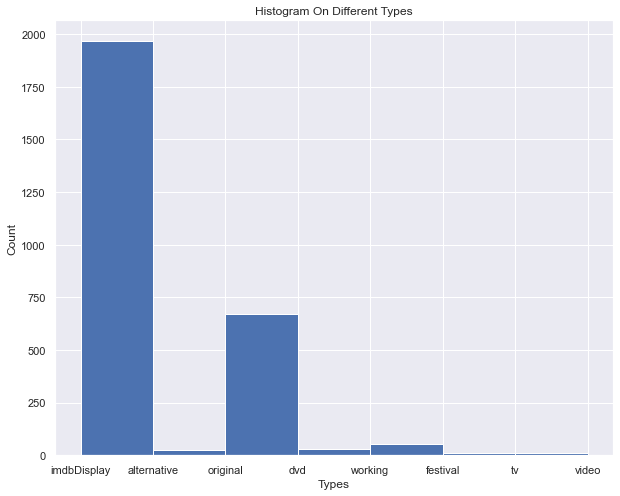

In [73]:
fig, ax=plt.subplots(figsize=(10,8))
ax.hist(x='types', bins = 7, data=df)
plt.title('Histogram On Different Types')
plt.xlabel('Types')
plt.ylabel('Count')
plt.show();

imdbDisplay had the highest frequency of occurence in the dataset followed by original. This shows that imdbDisplay was more often the considered type of movies to be watched.

# Conclusion And Recommendation

The Analysis above leads to the following recommendations to Microsoft:

*ImdbDisplay is the most common type of movie types*-> The frequency on the histogram(last plot) shows that it is more than twice as common as the other types of movie types. This would minimize the risk on investment compared to the other types

*Originality of the video title has no big influence on the total gross revenue*-> There was only one type of original that had its original titles and other types were performing better in terms of revenue generation. It is thus clear that the business should not venture fully into providing original titled movies, but rather aim at renaming the titles to create more traffic. This would increase their market. It is advisable that Microsoft invites stakeholders to invest their movies in their studio

*ImdbDisplay has a higher profit margin* -> From the analysis it is evident that apart from the last year 2018, ImdbDisplay has been taking the lead in terms of the profits made. This gives a higher probability that the investment made through ImdbDisplay would be returned at a faster rate compared to investments made on other types of movies. Thus i recommend publishing ImdB type of movies on the microsoft studio that you intend to start.